In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)  # n_features for 2 d array one for x and one for y axes
#y for which points belongs to which cluster

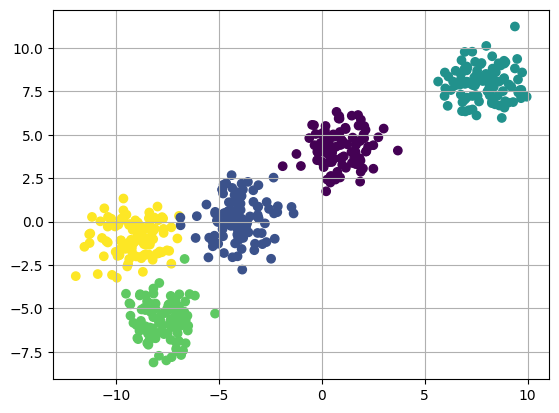

In [3]:
fig=plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [4]:
colors=['green','yellow','blue','cyan','red']

In [5]:
clusters={} 
k=5
for i in range(k):
    center=10*(2*np.random.random(x.shape[1],)-1)
    points=[]
    cluster={'center':center,
              'points':points,
              'color':colors[i]}
    clusters[i]=cluster
clusters

{0: {'center': array([-6.52650112,  9.38467303]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-8.09854353, -3.96345761]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([ 3.97093602, -4.59016918]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 5.88674773, -7.28023343]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([4.62061021, 5.40645888]), 'points': [], 'color': 'red'}}

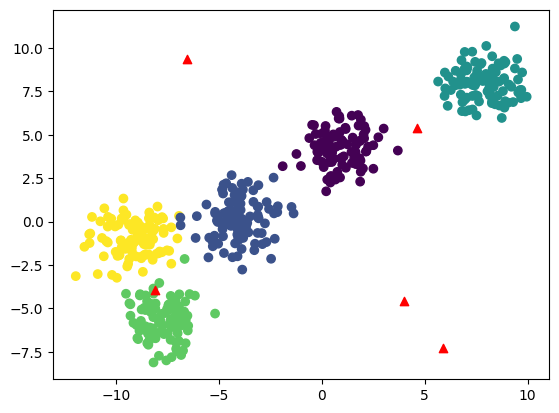

In [6]:
plt.scatter(x[:,0],x[:,1],c=y)
for i in clusters:
    center=clusters[i]['center']
    plt.scatter(center[0],center[1],marker='^',c='red')
plt.show()

In [7]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

v1=np.array([1,2])
v2=np.array([3,4])
distance(v1,v2)

2.8284271247461903

In [8]:
def assign_cluster():
    for idx in range(x.shape[0]):
        dist=[]
        curr_x=x[idx]
        for i in range(k):
            dis=distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster=np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

In [9]:
assign_cluster()

In [10]:
clusters

{0: {'center': array([-6.52650112,  9.38467303]),
  'points': [array([-4.38019548,  2.67413973]),
   array([-3.58831711,  2.28743063])],
  'color': 'green'},
 1: {'center': array([-8.09854353, -3.96345761]),
  'points': [array([-6.94238952, -6.8807223 ]),
   array([-3.61995355, -0.07726913]),
   array([-8.91918262, -6.772189  ]),
   array([-7.37151112, -5.0506429 ]),
   array([-4.65743008,  0.05077508]),
   array([-9.85614721, -1.94829844]),
   array([-7.03064028, -7.47212242]),
   array([-6.74761638, -5.40793452]),
   array([-3.8987193 ,  0.15219193]),
   array([-6.83038032, -7.68741713]),
   array([-4.65780461,  0.51339663]),
   array([-9.14747586, -5.83583269]),
   array([-6.67147607, -5.89031942]),
   array([-7.33837507, -5.9643993 ]),
   array([-7.82304106, -6.34230341]),
   array([-3.78877994, -0.0248327 ]),
   array([-6.60607411, -5.67971605]),
   array([-10.3969262 ,  -0.28827972]),
   array([-9.18719238, -0.47349654]),
   array([-4.45650534,  0.65156136]),
   array([-8.1132421

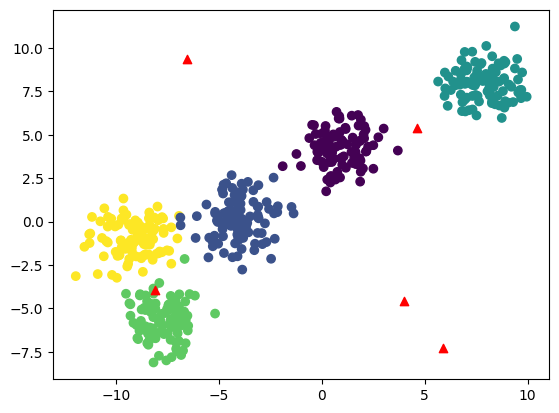

In [11]:
plt.scatter(x[:,0],x[:,1],c=y)
for i in clusters:
    center=clusters[i]['center']
    plt.scatter(center[0],center[1],marker='^',c='red')
plt.show()

In [12]:
def plot():
    for i in clusters:
        pt=np.array(clusters[i]['points'])
        try:
            plt.scatter(pt[:,0],pt[:,1],c=clusters[i]['color'])
        except:
            pass
        center=clusters[i]['center']
        plt.scatter(center[0],center[1],c='red',marker='*')

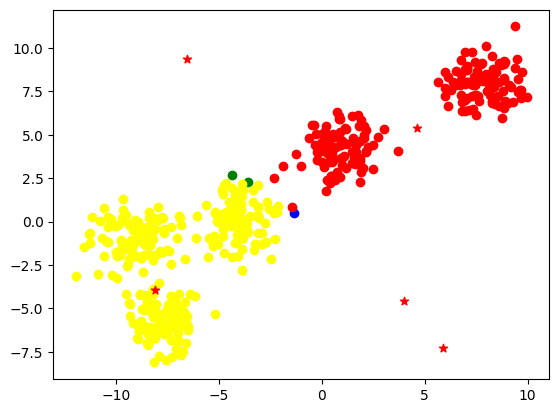

In [13]:
plot()

In [14]:
def update_clusters():
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        if(pts.shape[0]>0):
            new_cen=pts.mean(axis=0)
            clusters[i]['center']=new_cen
            pts=[]

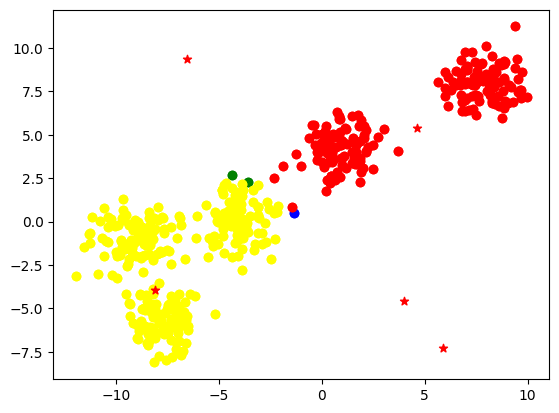

In [15]:
assign_cluster()
plot()
update_clusters()

# Clustring Using Sklearn KMeans

In [16]:
from sklearn.cluster import KMeans
datax,datay=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)  # n_features for 2 d array one for x and one for y axes

km=KMeans(n_clusters=5)
km.fit(datax,datay)
center=km.cluster_centers_
print(center.shape)
labels=km.labels_

(5, 2)


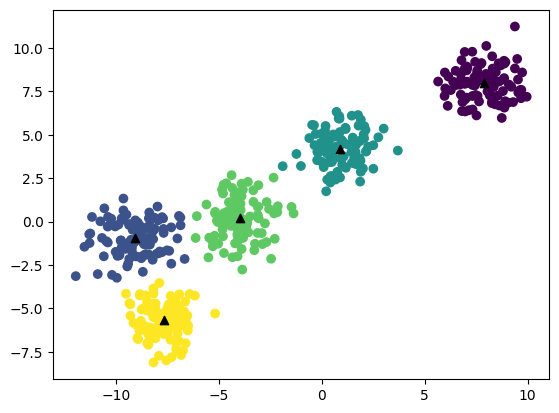

In [17]:
plt.scatter(datax[:,0],datax[:,1],c=labels)
plt.scatter(center[:,0],center[:,1],c="black",marker='^')
plt.show()